
# Cleaning data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cars.csv to Cars.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
cars = pd.read_csv(io.BytesIO(uploaded['Cars.csv']))

General info info about dataset

In [ ]:
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

There is some missing values in few columns. Let's count amount of missing values for each column

In [ ]:
null_columns = cars.columns[cars.isnull().any()]
cars[null_columns].isnull().sum()

Engine Fuel Type       3
Engine HP             69
Engine Cylinders      30
Number of Doors        6
Market Category     3742
dtype: int64

The easy way to clean the data set from  values is to drop all rows with missing values, by using "dropna" from pandas. Below is hashed example:


In [ ]:
# cars.dropna(inplace=True)  # inplace=True means it keeps the DataFrame with valid entries in the same variable
# cars_new = cars.dropna()   # Here the new data set is created without changing the old one 

 But let's take a closer look on the data set. 

Head of columns with missing values 

In [ ]:
cars[cars.isnull().any(axis=1)][null_columns].head()

,Engine Fuel Type,Engine HP,Engine Cylinders,Number of Doors,Market Category
87,regular unleaded,115.0,4.0,2.0,NaN
88,regular unleaded,115.0,4.0,2.0,NaN
91,regular unleaded,115.0,4.0,2.0,NaN
92,regular unleaded,115.0,4.0,2.0,NaN
93,regular unleaded,115.0,4.0,2.0,NaN


Print out all missing Engne Fuel Type from dataframe 'null_columns'.Unfortunatelly we cannot see the name for the car so we cannot fill up missing variables. Let's check it with all columns.

In [ ]:
cars[cars['Engine Fuel Type'].isnull()][null_columns]

,Engine Fuel Type,Engine HP,Engine Cylinders,Number of Doors,Market Category
11321,NaN,155.0,6.0,4.0,NaN
11322,NaN,155.0,6.0,4.0,NaN
11323,NaN,155.0,6.0,4.0,NaN


Here is the way to print out rows where are missing Engine Cylinders with all columns. The missing variables are for Suzuki Verona. After some research I found that the Engine Fuel Type is regular unleaded, and market category is Mid size sedan.

In [ ]:
cars.loc[cars['Engine Fuel Type'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499


Let's check what kind of category do we have for Engine Fuel type and Market

In [ ]:
cars['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [ ]:
cars['Market Category'].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

In [ ]:
cars['Market Category'].value_counts()

Crossover                                          1110
Flex Fuel                                           872
Luxury                                              855
Luxury,Performance                                  673
Hatchback                                           641
                                                   ... 
Crossover,Exotic,Luxury,High-Performance              1
Performance,Hybrid                                    1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Exotic,Luxury,High-Performance,Hybrid                 1
Crossover,Exotic,Luxury,Performance                   1
Name: Market Category, Length: 71, dtype: int64

In Engine Fuel Type exists such category like "Regular unleaded". Column "Market Catehory" looks very confused, there are over 3000 missing values(Look at 5th cell), and a lot of cars has so many categories that I doubt this column will be usefull in our model. At the end I will make confusion matrix, and than decide to drop this column or not.

Let's fill missing Fuel type for Suzuki.
We know that only missing values in column "Engine Fuel Type" have to be filled with "regular unleaded"


In [ ]:
cars['Engine Fuel Type'].fillna('regular unleaded', inplace=True)

After my research for looking Fuel type I found there are others Suzuki wich could gave me an answer at the beginning...

In [ ]:
cars[cars['Model'] == 'Verona']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499
11324,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,19349
11325,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,21049
11326,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,17549
11327,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,20549
11328,Suzuki,Verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20299
11329,Suzuki,Verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18299


Let's check Engine HP missing data

In [ ]:
x = pd.DataFrame(cars.loc[cars['Engine HP'].isnull()])

In [ ]:
x[x['Engine HP'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,62915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,35700
9851,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,33700
9852,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,33950
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,31950


In [ ]:
x.groupby(['Make','Model']).mean()

Year  Engine HP  ...  Popularity          MSRP
Make          Model                                ...                          
Chevrolet     Impala       2016.000000        NaN  ...      1385.0  39194.166667
FIAT          500e         2016.000000        NaN  ...       819.0  31800.000000
Ford          Escape       2017.000000        NaN  ...      5657.0  27975.000000
              Focus        2016.000000        NaN  ...      5657.0  29153.333333
              Freestar     2005.000000        NaN  ...      5657.0  26984.166667
Honda         Fit EV       2013.500000        NaN  ...      2202.0  36625.000000
Kia           Soul EV      2015.600000        NaN  ...      1720.0  34250.000000
Lincoln       Continental  2017.000000        NaN  ...        61.0  59415.000000
              MKZ          2017.000000        NaN  ...        61.0  39737.500000
Mercedes-Benz M-Class      2015.000000        NaN  ...       617.0  49800.000000
Mitsubishi    i-MiEV       2014.000000        NaN  ...       436.0  22995.000000
Nissan        Leaf         2015.000000        NaN  ...      2009.0  32423.000000
Tesla         Model S      2015.277778        NaN  ...      1391.0  85255.555556
Toyota        RAV4 EV      2013.500000        NaN  ...      2031.0  49800.000000

[14 rows x 8 columns]

Here is too many different types of cars with missing values, we don't want to spend too much time on cleaning data. 
Below is the code too drop rows with missing values in HP column

In [ ]:
cars.dropna(subset=['Engine HP'], inplace=True) # You have to use Inplace=True which means not creating new data set but delete rows with missing values in already existing datset.


Print out all missing Engne Cylinders from dataframe 'null_columns'.
First ten rows are electric cars, so there should be variable 0 in Engine Cylinders.
Unfortunatelly we cannot see the name for the car so we cannot fill up missing Engne cylinders of the other cars. Let's check it with all columns.

In [ ]:
cars[cars['Engine Cylinders'].isnull()][null_columns]

,Engine Fuel Type,Engine HP,Engine Cylinders,Number of Doors,Market Category
1983,electric,200.0,NaN,4.0,Hatchback
1984,electric,200.0,NaN,4.0,Hatchback
3716,electric,115.0,NaN,4.0,Hatchback
3717,electric,115.0,NaN,4.0,Hatchback
3718,electric,115.0,NaN,4.0,Hatchback
3719,electric,115.0,NaN,4.0,Hatchback
5779,electric,66.0,NaN,4.0,Hatchback
5780,electric,66.0,NaN,4.0,Hatchback
8373,electric,154.0,NaN,4.0,Crossover
8695,regular unleaded,255.0,NaN,2.0,"Factory Tuner,Performance"


Here is the way to print out rows where are missing Engine Cylinders with all columns. Except electric cars which of course have no cylinders, on the list are only Mazdas. After some research I found that Mazda has the Wankel Engine and all cars from the list have 2 cylinders.

There is another thing which I don't like is fuel consumption for electric cars. How does it possible that car with no cylinder has any consumption of fuel? I will fix but first I am going to change values in fuel consumption from MPG to l/km.


In [ ]:
cars.loc[cars['Engine Cylinders'].isin(['NaN'])] 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,36620
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,33450
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35445
3718,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,28995
3719,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35595
5779,Mitsubishi,i-MiEV,2016,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995
5780,Mitsubishi,i-MiEV,2017,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,102,121,436,22995
8373,Toyota,RAV4 EV,2012,electric,154.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Crossover,Midsize,4dr SUV,74,78,2031,49800
8695,Mazda,RX-7,1993,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23,15,586,7523


Let's fill the missing Engine Cylinders in data set. I have to write down to lines, in the first one I use mapping Engine cyliders with Type of fuel, for Mazdas missing Engine cylinders I use Mark, beacuse there is two type of fuel.

In [ ]:
# Filling missing 'Engine Cylinders' for electric cars
cars['Engine Cylinders'] = cars['Engine Cylinders'].fillna(cars['Engine Fuel Type'].map({'electric': 0.0}))
# Filling missing 'Engine Cylinders' for Mazdas
cars['Engine Cylinders'] = cars['Engine Cylinders'].fillna(cars['Make'].map({'Mazda': 2}))

Prinit out row with missing Number of Doors

In [ ]:
cars.loc[cars['Number of Doors'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000


Let's chek if there is any other Ferrari FF Model

In [ ]:
cars.loc[cars['Model'] == 'FF']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
4667,Ferrari,FF,2014,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
4668,Ferrari,FF,2015,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000


There is two other Ferraris FF and the Number of doors is 2. It is obvious that Ferrari has two doors because it is a sport car. Only one Ferrari had 4 doors, it was 456 GT model.

With 'fillna' function you can easily fill missing values in your data set

In [ ]:
values = {'Number of Doors': 2.0} # 2.0 like two other Ferraris
cars.fillna(value=values, inplace=True)

The Cars data set comes from USA, and ther fuel consumption is counted in Miles/Galons which for me as a European is uncofortable. 
I will change the names of two columns "highway MPG" and "city mpg", and recount all values in those two columns.

In [ ]:
cars.rename({'highway MPG' : 'Highway l/100km', 'city mpg' : 'City l/100km'}, axis=1, inplace=True)

In [ ]:
cars.columns.values

array(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size',
       'Vehicle Style', 'Highway l/100km', 'City l/100km', 'Popularity',
       'MSRP'], dtype=object)

To converse MPG to l/km we have to divide magic value 235,8 by MPG.
235,8 / MPG = l/km
Example for BMW 1 Series M with index 0 
-Highway MPG 235,8 / 26 = 9,06
-City MPG 235,8 / 19 = 12,41
Of course we won't count all rows manually. For this I will create simple function.

The first option to change values is using lambda

In [ ]:
cars['Highway l/100km'] = cars['Highway l/100km'].apply(lambda x: 235.8 // x)

The second one is to create function to convert values from MPG to l/100km

In [ ]:
def MPG_to_LperKM (MPG):
  return 235.8 // MPG

In [ ]:
cars['City l/100km'] = cars['City l/100km'].apply(MPG_to_LperKM)

Below you can see already changed values to l/100km. To divide I used '//' because I don't need decimal parts.

In [ ]:
cars[['Highway l/100km', 'City l/100km']]

,Highway l/100km,City l/100km
0,9.0,12.0
1,8.0,12.0
2,8.0,11.0
3,8.0,13.0
4,8.0,13.0
...,...,...
11909,10.0,14.0
11910,10.0,14.0
11911,10.0,14.0
11912,10.0,14.0


Let's check general info about our data set, we cleaned all missing values except 'Market Category' column

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11845 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11845 non-null  object 
 1   Model              11845 non-null  object 
 2   Year               11845 non-null  int64  
 3   Engine Fuel Type   11845 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11845 non-null  float64
 6   Transmission Type  11845 non-null  object 
 7   Driven_Wheels      11845 non-null  object 
 8   Number of Doors    11845 non-null  float64
 9   Market Category    8114 non-null   object 
 10  Vehicle Size       11845 non-null  object 
 11  Vehicle Style      11845 non-null  object 
 12  Highway l/100km    11845 non-null  float64
 13  City l/100km       11845 non-null  float64
 14  Popularity         11845 non-null  int64  
 15  MSRP               11845 non-null  int64  
dtypes: float64(5), int64(3

Above we can see there are only missing values in 'Market Category'.
There is too many missing values to try to fill them, I will drop all rows woth those values.
I know that missing values from 'Market Category' 

In [ ]:
cars.dropna(subset=['Market Category'], inplace=True)

Let's check data set info. There should be no missing values.

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8114 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               8114 non-null   object 
 1   Model              8114 non-null   object 
 2   Year               8114 non-null   int64  
 3   Engine Fuel Type   8114 non-null   object 
 4   Engine HP          8114 non-null   float64
 5   Engine Cylinders   8114 non-null   float64
 6   Transmission Type  8114 non-null   object 
 7   Driven_Wheels      8114 non-null   object 
 8   Number of Doors    8114 non-null   float64
 9   Market Category    8114 non-null   object 
 10  Vehicle Size       8114 non-null   object 
 11  Vehicle Style      8114 non-null   object 
 12  Highway l/100km    8114 non-null   float64
 13  City l/100km       8114 non-null   float64
 14  Popularity         8114 non-null   int64  
 15  MSRP               8114 non-null   int64  
dtypes: float64(5), int64(3)

From detalis about our data set we can clearly see there is no more missing values.
The other way is to check the sum of missing values in null_columns data set, which supposed to be 0 as well.

In [ ]:
cars[null_columns].isnull().sum()

Engine Fuel Type    0
Engine HP           0
Engine Cylinders    0
Number of Doors     0
Market Category     0
dtype: int64

In [ ]:
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway l/100km,City l/100km,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,9.0,12.0,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,8.0,12.0,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,8.0,11.0,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,8.0,13.0,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,8.0,13.0,3916,34500


I will change column name MSRP to Price

In [ ]:
cars.rename({'MSRP' : 'Price'}, axis=1, inplace=True) # axis=1 means we chose columns (axis=0 means rows)

The data is with USA prices which are in dollars, I will change the price to Euro. When I am doing this cleaning, the dollar has value 0,83 euro.

In [ ]:
cars['Price'] = cars['Price'].apply(lambda x: 0.83 * x)

In [ ]:
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway l/100km,City l/100km,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,9.0,12.0,3916,38292.05
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,8.0,12.0,3916,33739.50
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,8.0,11.0,3916,30170.50
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,8.0,13.0,3916,24443.50
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,8.0,13.0,3916,28635.00


Checking columns names. We can see that the last column now is called 'Price'

In [ ]:
cars.columns.values

array(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size',
       'Vehicle Style', 'Highway l/100km', 'City l/100km', 'Popularity',
       'Price'], dtype=object)

Below we can see there are few columns which are float type but their decimal parts are always 0. I will convert those values from float to int64. 

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8114 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               8114 non-null   object 
 1   Model              8114 non-null   object 
 2   Year               8114 non-null   int64  
 3   Engine Fuel Type   8114 non-null   object 
 4   Engine HP          8114 non-null   float64
 5   Engine Cylinders   8114 non-null   float64
 6   Transmission Type  8114 non-null   object 
 7   Driven_Wheels      8114 non-null   object 
 8   Number of Doors    8114 non-null   float64
 9   Market Category    8114 non-null   object 
 10  Vehicle Size       8114 non-null   object 
 11  Vehicle Style      8114 non-null   object 
 12  Highway l/100km    8114 non-null   float64
 13  City l/100km       8114 non-null   float64
 14  Popularity         8114 non-null   int64  
 15  Price              8114 non-null   float64
dtypes: float64(6), int64(2)

Here is an example how to convert all float columns from yur dataframe to integers

In [ ]:
float_col = cars.select_dtypes(include=['float64'])

for col in float_col.columns.values:
  cars[col] = cars[col].astype('int64') 

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8114 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               8114 non-null   object
 1   Model              8114 non-null   object
 2   Year               8114 non-null   int64 
 3   Engine Fuel Type   8114 non-null   object
 4   Engine HP          8114 non-null   int64 
 5   Engine Cylinders   8114 non-null   int64 
 6   Transmission Type  8114 non-null   object
 7   Driven_Wheels      8114 non-null   object
 8   Number of Doors    8114 non-null   int64 
 9   Market Category    8114 non-null   object
 10  Vehicle Size       8114 non-null   object
 11  Vehicle Style      8114 non-null   object
 12  Highway l/100km    8114 non-null   int64 
 13  City l/100km       8114 non-null   int64 
 14  Popularity         8114 non-null   int64 
 15  Price              8114 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 1.1+

In [ ]:
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway l/100km,City l/100km,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,9,12,3916,38292
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,8,12,3916,33739
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,8,11,3916,30170
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,8,13,3916,24443
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,8,13,3916,28635


Now is the time to fix values of fuel consumption for electric cars. I decide to do this at the end because now all values are INT32, and the rest of data set is cleaned.

Let's check fuel consumption for electric cars

In [ ]:
cars[cars['Engine Fuel Type'] == 'electric']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway l/100km,City l/100km,Popularity,Price
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177,0,DIRECT_DRIVE,front wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,2,2,617,34403
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177,0,DIRECT_DRIVE,front wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,2,2,617,34403
1682,Mercedes-Benz,B-Class Electric Drive,2017,electric,177,0,DIRECT_DRIVE,front wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,2,2,617,33117
1983,Chevrolet,Bolt EV,2017,electric,200,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,2,1,1385,33951
1984,Chevrolet,Bolt EV,2017,electric,200,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,2,1,1385,30394
3716,Volkswagen,e-Golf,2015,electric,115,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,2,1,873,27763
3717,Volkswagen,e-Golf,2015,electric,115,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,2,1,873,29419
3718,Volkswagen,e-Golf,2016,electric,115,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,2,1,873,24065
3719,Volkswagen,e-Golf,2016,electric,115,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,2,1,873,29543
5779,Mitsubishi,i-MiEV,2016,electric,66,0,DIRECT_DRIVE,rear wheel drive,4,Hatchback,Compact,4dr Hatchback,2,1,436,19085


From the table above we can see that fuel consumption in the City or on the Highway for 0 cylinders is not higher then 4. Below the table for cars with fuel consumtion in the the city or on the Highway with less than 4l/100km

In [ ]:
cars[(cars['Highway l/100km'] < 4) | (cars['City l/100km'] < 4)]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway l/100km,City l/100km,Popularity,Price
1119,Audi,A6,2017,premium unleaded (recommended),252,4,AUTOMATED_MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,0,9,3105,42828
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177,0,DIRECT_DRIVE,front wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,2,2,617,34403
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177,0,DIRECT_DRIVE,front wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,2,2,617,34403
1682,Mercedes-Benz,B-Class Electric Drive,2017,electric,177,0,DIRECT_DRIVE,front wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,2,2,617,33117
1983,Chevrolet,Bolt EV,2017,electric,200,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,2,1,1385,33951
1984,Chevrolet,Bolt EV,2017,electric,200,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,2,1,1385,30394
3716,Volkswagen,e-Golf,2015,electric,115,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,2,1,873,27763
3717,Volkswagen,e-Golf,2015,electric,115,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,2,1,873,29419
3718,Volkswagen,e-Golf,2016,electric,115,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,2,1,873,24065
3719,Volkswagen,e-Golf,2016,electric,115,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,2,1,873,29543


Look at the first record, there is another bug! We have to replace fuel consumption on the Highway for Audi.

In [ ]:
cars[(cars['Make'] == 'Audi') & (cars['Model'] == 'A6') & (cars['Year'] == 2017)]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway l/100km,City l/100km,Popularity,Price
1114,Audi,A6,2017,premium unleaded (recommended),252,4,AUTOMATIC,all wheel drive,4,Luxury,Midsize,Sedan,7,10,3105,44654
1115,Audi,A6,2017,premium unleaded (required),333,6,AUTOMATIC,all wheel drive,4,"Luxury,Performance",Midsize,Sedan,7,10,3105,51128
1116,Audi,A6,2017,premium unleaded (required),340,6,AUTOMATIC,all wheel drive,4,"Luxury,Performance",Midsize,Sedan,7,10,3105,56108
1117,Audi,A6,2017,premium unleaded (required),333,6,AUTOMATIC,all wheel drive,4,"Luxury,Performance",Midsize,Sedan,8,11,3105,48638
1118,Audi,A6,2017,premium unleaded (recommended),252,4,AUTOMATIC,all wheel drive,4,Luxury,Midsize,Sedan,7,10,3105,41334
1119,Audi,A6,2017,premium unleaded (recommended),252,4,AUTOMATED_MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,0,9,3105,42828
1120,Audi,A6,2017,premium unleaded (recommended),252,4,AUTOMATED_MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,6,9,3105,39508


In table above we can see fuel consumption in the City for missing AUDI 

In [ ]:
cars['Highway l/100km'] = cars['Highway l/100km'].replace([0], 6)

In [ ]:
cars[(cars['Make'] == 'Audi') & (cars['Model'] == 'A6') & (cars['Year'] == 2017)]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway l/100km,City l/100km,Popularity,Price
1114,Audi,A6,2017,premium unleaded (recommended),252,4,AUTOMATIC,all wheel drive,4,Luxury,Midsize,Sedan,7,10,3105,44654
1115,Audi,A6,2017,premium unleaded (required),333,6,AUTOMATIC,all wheel drive,4,"Luxury,Performance",Midsize,Sedan,7,10,3105,51128
1116,Audi,A6,2017,premium unleaded (required),340,6,AUTOMATIC,all wheel drive,4,"Luxury,Performance",Midsize,Sedan,7,10,3105,56108
1117,Audi,A6,2017,premium unleaded (required),333,6,AUTOMATIC,all wheel drive,4,"Luxury,Performance",Midsize,Sedan,8,11,3105,48638
1118,Audi,A6,2017,premium unleaded (recommended),252,4,AUTOMATIC,all wheel drive,4,Luxury,Midsize,Sedan,7,10,3105,41334
1119,Audi,A6,2017,premium unleaded (recommended),252,4,AUTOMATED_MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,6,9,3105,42828
1120,Audi,A6,2017,premium unleaded (recommended),252,4,AUTOMATED_MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,6,9,3105,39508


Now I will replace all Fuel consumption values with 0 for electric cars.

I am using condition less then 4, because in previous table we can see there is no other cars with consumption less then 4l/100km.

In [ ]:
cars.loc[(cars["Highway l/100km"] < 4), 'Highway l/100km'] = 0
cars.loc[(cars["City l/100km"] < 4), 'City l/100km'] = 0

In [ ]:
cars[cars['Engine Fuel Type'] == 'electric']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway l/100km,City l/100km,Popularity,Price
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177,0,DIRECT_DRIVE,front wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,0,0,617,34403
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177,0,DIRECT_DRIVE,front wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,0,0,617,34403
1682,Mercedes-Benz,B-Class Electric Drive,2017,electric,177,0,DIRECT_DRIVE,front wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,0,0,617,33117
1983,Chevrolet,Bolt EV,2017,electric,200,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,0,0,1385,33951
1984,Chevrolet,Bolt EV,2017,electric,200,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,0,0,1385,30394
3716,Volkswagen,e-Golf,2015,electric,115,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,0,0,873,27763
3717,Volkswagen,e-Golf,2015,electric,115,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,0,0,873,29419
3718,Volkswagen,e-Golf,2016,electric,115,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,0,0,873,24065
3719,Volkswagen,e-Golf,2016,electric,115,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,0,0,873,29543
5779,Mitsubishi,i-MiEV,2016,electric,66,0,DIRECT_DRIVE,rear wheel drive,4,Hatchback,Compact,4dr Hatchback,0,0,436,19085


In Visualisation section I noticed there are few UNKNOWN values in "type of transmition" column. I will fix it here
First, let's check how many cars have UNKNOWN type of transmition

In [ ]:
cars[cars['Transmission Type'] == 'UNKNOWN']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway l/100km,City l/100km,Popularity,Price
4691,Pontiac,Firebird,2000,regular unleaded,305,8,UNKNOWN,rear wheel drive,2,"Hatchback,Performance",Midsize,2dr Hatchback,10,15,210,5125
4692,Pontiac,Firebird,2000,regular unleaded,305,8,UNKNOWN,rear wheel drive,2,"Hatchback,Factory Tuner,Performance",Midsize,2dr Hatchback,10,15,210,7094
4693,Pontiac,Firebird,2000,regular unleaded,305,8,UNKNOWN,rear wheel drive,2,"Factory Tuner,Performance",Midsize,Convertible,10,15,210,7940


I found that Pontiac Firebird from 2000 with 305hp has automatic transmiton.
Source: https://www.autoblog.com/buy/2000-Pontiac-Firebird-Trans_Am__2dr_Coupe/
Below code to replace UNKNOWN values with AUTOMATIC

In [ ]:
cars['Transmission Type'] = cars['Transmission Type'].replace(['UNKNOWN'], 'AUTOMATIC')

In [ ]:
cars['Transmission Type'].value_counts()

AUTOMATIC           5771
MANUAL              1708
AUTOMATED_MANUAL     611
DIRECT_DRIVE          24
Name: Transmission Type, dtype: int64

Before I start making plots, let's clear out any outliners from dataset.

In [ ]:
cars.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,Highway l/100km,City l/100km,Popularity,Price
count,8114.000000,8114.000000,8114.000000,8114.000000,8114.000000,8114.000000,8114.000000,8.114000e+03
mean,2012.051516,274.411881,5.763125,3.415332,8.863816,12.514789,1496.769904,4.152202e+04
std,6.318106,115.006666,1.902878,0.897587,2.218234,3.533934,1412.216774,5.829021e+04
min,1990.000000,55.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.660000e+03
25%,2010.000000,192.000000,4.000000,2.000000,7.000000,10.000000,549.000000,2.152875e+04
50%,2015.000000,263.000000,6.000000,4.000000,9.000000,13.000000,1013.000000,2.904300e+04
75%,2016.000000,320.000000,6.000000,4.000000,10.000000,14.000000,2009.000000,4.041775e+04
max,2017.000000,1001.000000,16.000000,4.000000,19.000000,33.000000,5657.000000,1.714698e+06


From the table above we can see there are outliners in Engine HP and in Price.
I will visualize few columns with boxplots

Text(0, 0.5, 'Engine HP')

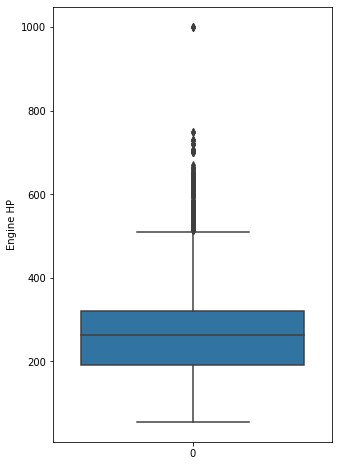

In [ ]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=cars['Engine HP'])
plt.ylabel('Engine HP')

Text(0, 0.5, 'Engine Cylinders')

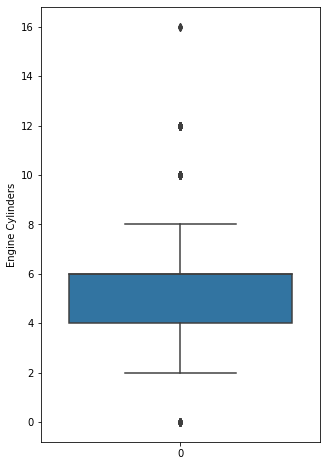

In [ ]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=cars['Engine Cylinders'])
plt.ylabel('Engine Cylinders')

Text(0, 0.5, 'Popularity')

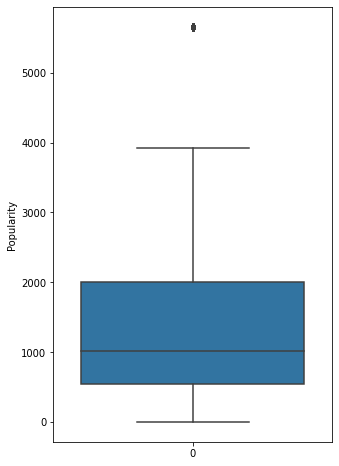

In [ ]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=cars['Popularity'])
plt.ylabel('Popularity')

Text(0, 0.5, 'Price')

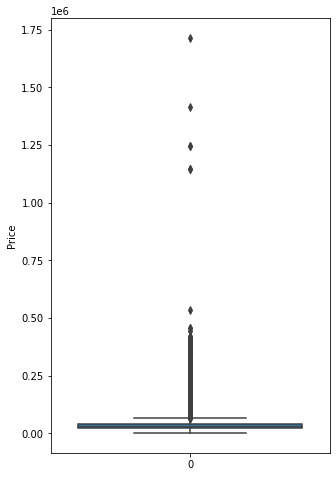

In [ ]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=cars['Price'])
plt.ylabel('Price')

Let's remove outliners

In [ ]:
def removing_outliners(dataframe, column):
  Q1 = dataframe[column].quantile(0.25)
  Q3 = dataframe[column].quantile(0.75)

  IQR = Q3 - Q1
  min = Q1 - 1.5 * IQR
  max = Q3 + 1.5 * IQR

  df_no_outliner = dataframe[(dataframe[column] > min) & (dataframe[column] < max)]

  return df_no_outliner

The cleaning cars data set is almost finished, the last thing to do is removing outliners with definition above. I will create cleaned data set which I will be using it in the next parts which are visualization and machine learning.

In [ ]:
cars_cleaned = cars.copy()

Removing outliners from dataset

In [ ]:
cars_cleaned = removing_outliners(cars_cleaned, "Engine HP")
cars_cleaned = removing_outliners(cars_cleaned, "Engine Cylinders")
cars_cleaned = removing_outliners(cars_cleaned, "Highway l/100km")
cars_cleaned = removing_outliners(cars_cleaned, "City l/100km")
cars_cleaned = removing_outliners(cars_cleaned, "Popularity")
cars_cleaned = removing_outliners(cars_cleaned, "Price")

Let's check our dataset. We can see there is no more outliners in any column.

In [ ]:
cars_cleaned.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,Highway l/100km,City l/100km,Popularity,Price
count,6530.000000,6530.000000,6530.000000,6530.000000,6530.000000,6530.000000,6530.000000,6530.000000
mean,2011.767534,243.857274,5.309035,3.499847,8.471210,11.795865,1203.738438,27785.226493
std,6.587502,78.703629,1.400084,0.861570,1.824221,2.652339,926.351858,13166.445635
min,1990.000000,55.000000,2.000000,2.000000,4.000000,5.000000,21.000000,1660.000000
25%,2010.000000,182.000000,4.000000,3.000000,7.000000,10.000000,535.000000,20354.250000
50%,2015.000000,240.000000,6.000000,4.000000,8.000000,12.000000,873.000000,27124.000000
75%,2016.000000,300.000000,6.000000,4.000000,9.000000,13.000000,1851.000000,35629.750000
max,2017.000000,505.000000,8.000000,4.000000,14.000000,19.000000,3916.000000,63412.000000


In [ ]:
cars_cleaned.to_csv('Cars_Cleaned.csv', index=False)

Here is the code to download .csv file to your downloads folder

In [ ]:
files.download('Cars_Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Here is the code to upload .csv file to your Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

# Visualization


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cars_Cleaned.csv to Cars_Cleaned.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
cars_cleaned = pd.read_csv(io.BytesIO(uploaded['Cars_Cleaned.csv']))

In [ ]:
cars_cleaned.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway l/100km,City l/100km,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,9,12,3916,38292
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,8,12,3916,33739
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,8,11,3916,30170
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,8,13,3916,24443
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,8,13,3916,28635


Fast glance on numeric values in our data set.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5a09a3350>,
      dtype=object)

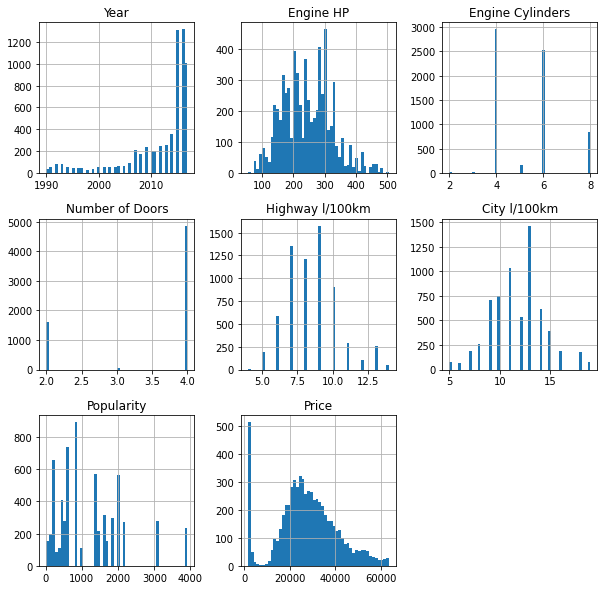

In [ ]:
cars_cleaned.hist(bins=50, figsize=(10,10))

Let's check how many cars we have from each year. Below the histogram and list of all cars grouped by years.

Text(0, 0.5, 'Amount of cars')

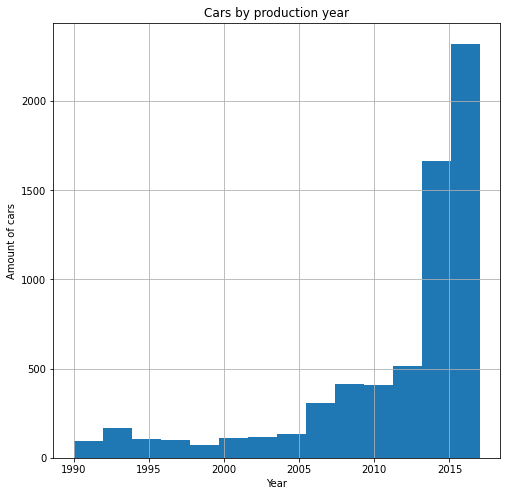

In [ ]:
plt.figure(figsize=(8,8))
cars_cleaned['Year'].hist(bins=14)
plt.title('Cars by production year')
plt.xlabel('Year')
plt.ylabel('Amount of cars')

Here is the list of all cars grouped by years

In [ ]:
cars_cleaned['Year'].value_counts()

Amount of cylinders in engines

Text(0, 0.5, 'Amount of cars')

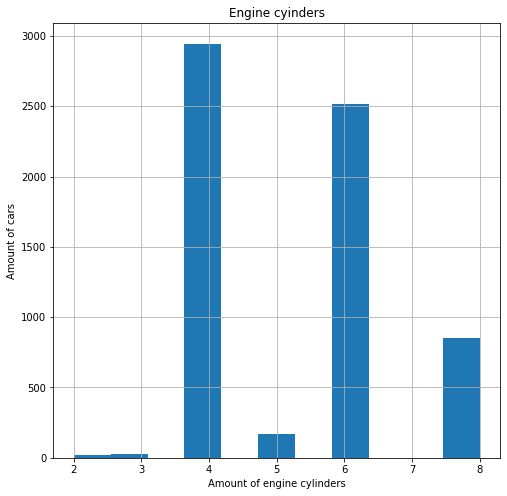

In [ ]:
plt.figure(figsize=(8,8))
cars_cleaned['Engine Cylinders'].hist(bins=11)
plt.title('Engine cyinders')
plt.xlabel('Amount of engine cylinders')
plt.ylabel('Amount of cars')

List of amount of cylinders

In [ ]:
cars_cleaned['Engine Cylinders'].value_counts()

4    2945
6    2516
8     853
5     170
3      26
2      20
Name: Engine Cylinders, dtype: int64

let's check how fuel consumption is changing according to amount of cylinders in the city and on Highway.


In [ ]:
# creating dataset with columns which are needed
cars_consumtion = cars_cleaned[["Engine Cylinders", "Highway l/100km", "City l/100km"]]
# using melt function to create new data set which I use to show two variables on one plot
fuel_consumption_melted = cars_consumtion.melt("Engine Cylinders", var_name='Highway/City', value_name='Fuel Consumption')

By seaborn library we can simply do the plot with multiply variables

Text(0.5, 1.0, 'Fuel Consumption - Highway/City')

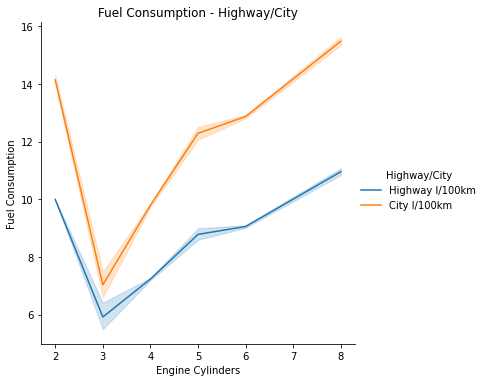

In [ ]:
sns.relplot(data=fuel_consumption_melted, x='Engine Cylinders', y='Fuel Consumption', hue='Highway/City' ,kind='line')
plt.title('Fuel Consumption - Highway/City')

Plot of fuel consumption in the city and on the highway for each transmition

Text(0.5, 1.0, 'Highway')

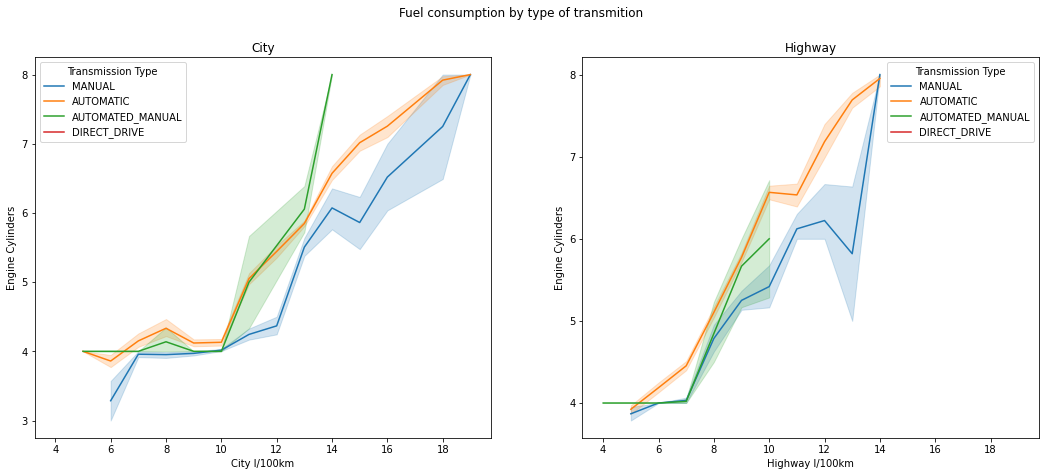

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharex=True)
fig.suptitle('Fuel consumption by type of transmition')

sns.lineplot(ax=axes[0], data=cars_cleaned, x='City l/100km', y='Engine Cylinders', hue='Transmission Type')
axes[0].set_title('City')

sns.lineplot(ax=axes[1], data=cars_cleaned, x='Highway l/100km', y='Engine Cylinders', hue='Transmission Type')
axes[1].set_title('Highway')



Boxplot Shwoing distribution of power engin for engines with different amount of cylinders

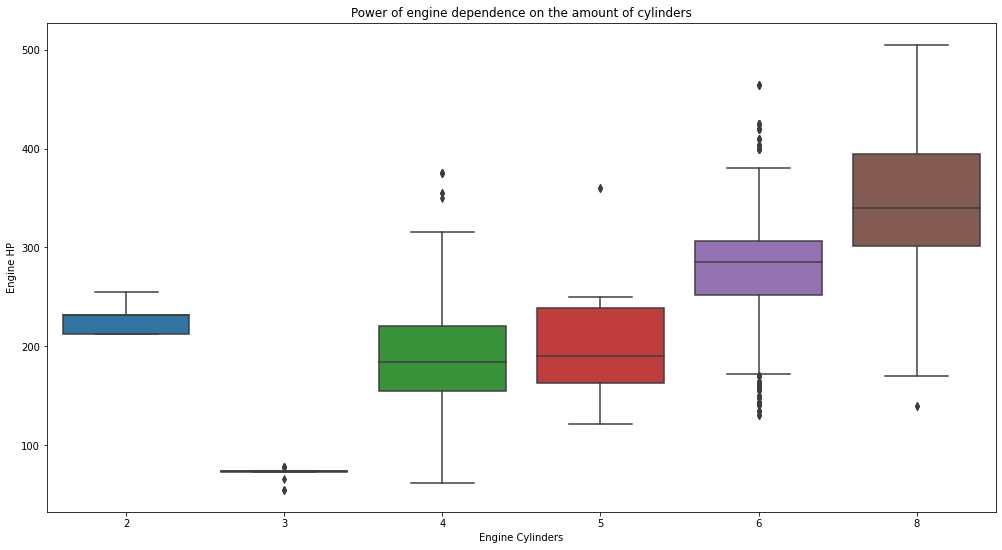

In [ ]:
plt.figure(figsize= (17, 9))
plt.title('Power of engine dependence on the amount of cylinders')
sns.boxplot(x='Engine Cylinders', y='Engine HP', data=cars_cleaned)

I found this function on stackoverflow 
https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
It adds values at the end of the bar.
This function was written for horizontal and vertical barplots.

In [ ]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

Plot amount of cars grouped by brands


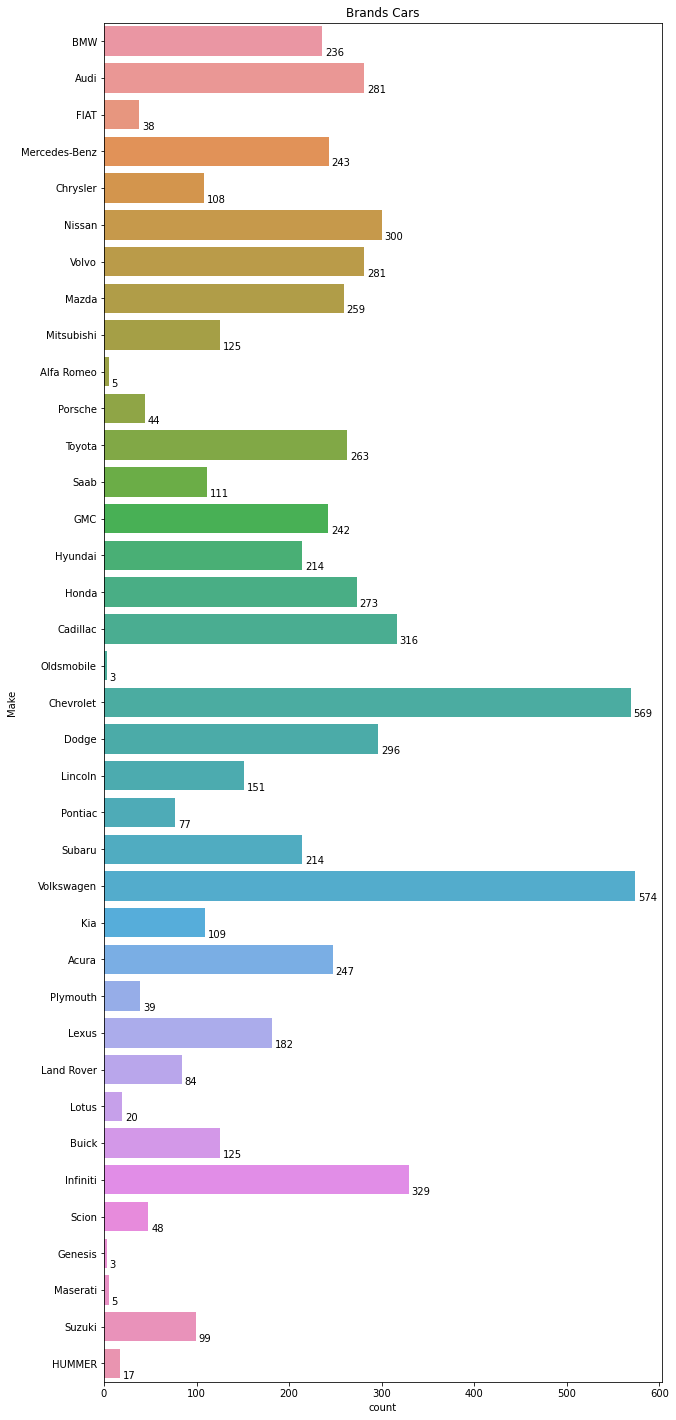

In [ ]:
# set the size of plot
plt.figure(figsize= (10, 25))
plt.title('Brands Cars')
# create the plot with seaborn
g = sns.countplot(y='Make', data=cars_cleaned)
# add values on plot with using "show_values_on_bars" function
show_values_on_bars(g, "h", 3)


Let's check overall price depend of the year of production cars

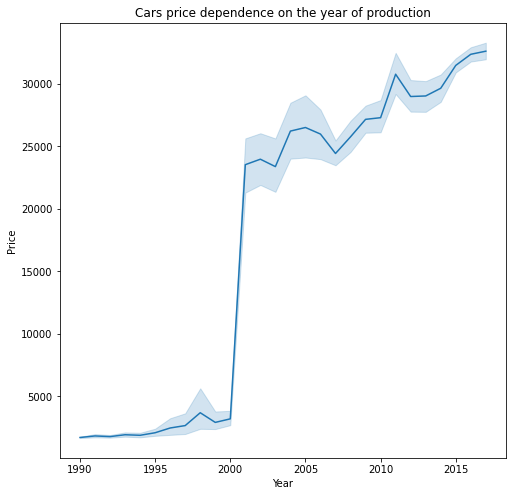

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Cars price dependence on the year of production')
sns.lineplot(data=cars_cleaned, x='Year', y='Price')

Plot above shows quite big variance in prices for some years.
Let's make a table with mean values for each brand.

In [ ]:
cars_cleaned.groupby('Make').mean().sort_values(by='Price', ascending=False)

,Year,Engine HP,Engine Cylinders,Number of Doors,Highway l/100km,City l/100km,Popularity,Price
Make,,,,,,,,
Maserati,2016.200000,356.800000,6.000000,4.000000,9.400000,14.200000,238.0,59768.200000
Lotus,2010.850000,238.650000,4.600000,2.000000,8.750000,11.600000,613.0,51225.250000
Alfa Romeo,2015.400000,237.000000,4.000000,2.000000,6.000000,9.000000,113.0,51128.000000
Porsche,2010.227273,301.022727,5.409091,2.681818,8.681818,12.568182,1715.0,40959.136364
Cadillac,2012.924051,309.908228,6.056962,3.588608,8.674051,12.927215,1624.0,40904.518987
BMW,2014.377119,284.190678,5.389831,3.135593,7.580508,11.309322,3916.0,39865.766949
Land Rover,2012.833333,253.119048,5.119048,3.738095,9.678571,13.166667,258.0,38962.226190
Genesis,2017.000000,347.333333,6.666667,4.000000,9.000000,14.000000,21.0,38691.666667
Lexus,2011.510989,267.065934,6.065934,3.692308,8.670330,11.510989,454.0,35228.857143


Here is the code to plot first 5 the most expensive cars from list above.
First I have to create new data sets with only 5 most expensive brands except Bugatti, because there is no match with price to other cars.

Text(0.5, 1.0, '5 most expensive brands')

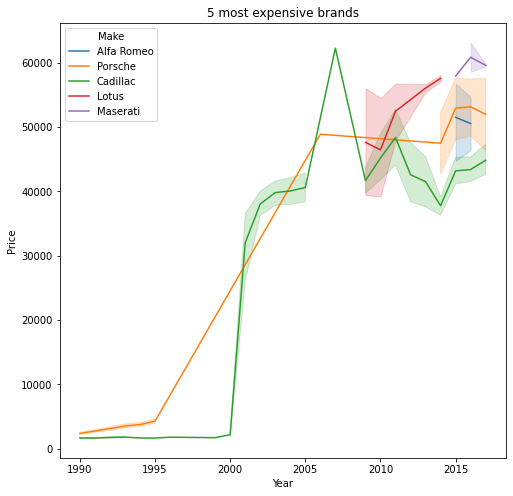

In [ ]:
top_price_brands = cars_cleaned[(cars_cleaned['Make'] == 'Maserati') | (cars_cleaned['Make'] == 'Lotus') | (cars_cleaned['Make'] == 'Alfa Romeo') | (cars_cleaned['Make'] == 'Porsche') | (cars_cleaned['Make'] == 'Cadillac')]
plt.figure(figsize=(8,8))
sns.lineplot(data=top_price_brands, x='Year', y='Price', hue='Make')
plt.title('5 most expensive brands')

Let's check prices for German brands. Like before first I will choose needed brands for plots, then I will make line plot by seaborn

Text(0.5, 1.0, 'Prices of German brands')

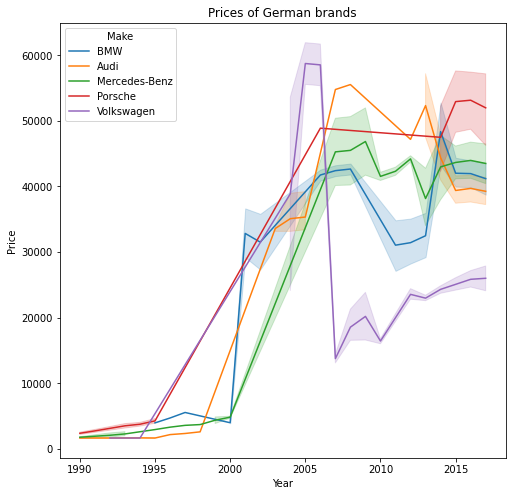

In [ ]:
germany_brands = cars_cleaned[(cars_cleaned['Make'] == 'BMW') | (cars_cleaned['Make'] == 'Audi') | (cars_cleaned['Make'] == 'Mercedes-Benz') | (cars_cleaned['Make'] == 'Porsche') | (cars_cleaned['Make'] == 'Volkswagen')]
plt.figure(figsize=(8,8))
sns.lineplot(data=germany_brands, x='Year', y='Price', hue='Make')
plt.title('Prices of German brands')

Below is the table where you can see why the price of Porsche between 2000-2005 is so high. There are two Carrera GT's and Panameras which are very expensive.
The second table is for Mercedes-Benz, we can see that the most expensive cars are like SLR-Mclaren, AMG-GT, S-class

In [ ]:
cars_cleaned[cars_cleaned['Make'] == 'Porsche'].sort_values(by='Price', ascending=False)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway l/100km,City l/100km,Popularity,Price
1438,Porsche,Cayenne,2017,premium unleaded (required),420,6,AUTOMATIC,all wheel drive,4,"Crossover,Luxury,Performance",Midsize,4dr SUV,9,13,1715,63246
3601,Porsche,Macan,2017,premium unleaded (required),400,6,AUTOMATED_MANUAL,all wheel drive,4,"Crossover,Luxury,Performance",Midsize,4dr SUV,10,13,1715,63080
1443,Porsche,Cayman,2015,premium unleaded (required),340,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,9,12,1715,62416
1446,Porsche,Cayman,2016,premium unleaded (required),340,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,9,12,1715,62416
1434,Porsche,Cayenne,2016,premium unleaded (required),420,6,AUTOMATIC,all wheel drive,4,"Crossover,Luxury,Performance",Midsize,4dr SUV,9,13,1715,62084
1282,Porsche,Boxster,2016,premium unleaded (required),330,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Convertible,9,12,1715,61918
1432,Porsche,Cayenne,2015,premium unleaded (required),420,6,AUTOMATIC,all wheel drive,4,"Crossover,Luxury,Performance",Midsize,4dr SUV,9,13,1715,61503
3598,Porsche,Macan,2016,premium unleaded (required),400,6,AUTOMATED_MANUAL,all wheel drive,4,"Crossover,Luxury,Performance",Midsize,4dr SUV,10,13,1715,61337
1279,Porsche,Boxster,2015,premium unleaded (required),330,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Convertible,9,12,1715,61005
3595,Porsche,Macan,2015,premium unleaded (required),400,6,AUTOMATED_MANUAL,all wheel drive,4,"Crossover,Luxury,Performance",Midsize,4dr SUV,10,13,1715,60009


In [ ]:
cars_cleaned[cars_cleaned['Make'] == 'Mercedes-Benz'].sort_values(by='Price', ascending=False)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway l/100km,City l/100km,Popularity,Price
1611,Mercedes-Benz,CLS-Class,2015,premium unleaded (required),402,8,AUTOMATIC,all wheel drive,4,"Luxury,High-Performance",Midsize,Sedan,9,13,617,62831
1335,Mercedes-Benz,C-Class,2017,premium unleaded (required),503,8,AUTOMATIC,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Midsize,Coupe,10,13,617,62250
1615,Mercedes-Benz,CLS-Class,2017,premium unleaded (required),402,8,AUTOMATIC,rear wheel drive,4,"Luxury,High-Performance",Midsize,Sedan,9,13,617,62125
1614,Mercedes-Benz,CLS-Class,2016,premium unleaded (required),402,8,AUTOMATIC,rear wheel drive,4,"Luxury,High-Performance",Midsize,Sedan,9,13,617,61503
1318,Mercedes-Benz,C-Class,2016,premium unleaded (required),503,8,AUTOMATIC,rear wheel drive,4,"Factory Tuner,Luxury,High-Performance",Midsize,Sedan,9,13,617,60797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,Mercedes-Benz,190-Class,1991,regular unleaded,158,6,MANUAL,rear wheel drive,4,Luxury,Compact,Sedan,9,13,617,1660
164,Mercedes-Benz,300-Class,1991,regular unleaded,177,6,AUTOMATIC,rear wheel drive,4,Luxury,Midsize,Sedan,10,14,617,1660
161,Mercedes-Benz,300-Class,1991,regular unleaded,158,6,AUTOMATIC,rear wheel drive,4,Luxury,Midsize,Sedan,10,13,617,1660
160,Mercedes-Benz,300-Class,1991,regular unleaded,177,6,AUTOMATIC,rear wheel drive,4,Luxury,Midsize,Wagon,11,15,617,1660


Let's check cars prices grouped by vehicles style  

In [ ]:
cars_cleaned.groupby('Vehicle Style').mean().sort_values(by='Price', ascending=False)

,Year,Engine HP,Engine Cylinders,Number of Doors,Highway l/100km,City l/100km,Popularity,Price
Vehicle Style,,,,,,,,
Convertible SUV,2014.600000,255.000000,5.200000,2.000000,9.200000,12.200000,1308.600000,39819.000000
Convertible,2011.125908,255.690073,5.232446,2.000000,8.181598,11.830508,1505.486683,32644.152542
4dr SUV,2014.215054,250.791398,5.380108,4.000000,8.933333,12.106989,1102.552688,31647.501075
Crew Cab Pickup,2012.428030,302.757576,7.045455,4.000000,11.174242,15.022727,1289.958333,31513.712121
Sedan,2011.444032,258.988868,5.349412,4.000000,7.951144,11.460111,1137.304267,30198.646259
2dr SUV,2008.272727,230.181818,4.909091,2.000000,9.545455,13.000000,310.909091,29507.272727
Coupe,2010.155932,292.715254,5.698305,2.057627,8.586441,12.561017,1487.659322,28820.354237
Passenger Van,2014.000000,310.000000,8.000000,3.000000,13.000000,18.000000,967.000000,27180.000000
Wagon,2009.446667,219.036667,4.886667,4.000000,8.303333,11.620000,1290.023333,25521.130000


Text(0.5, 1.0, 'Top prices by vehicle style')

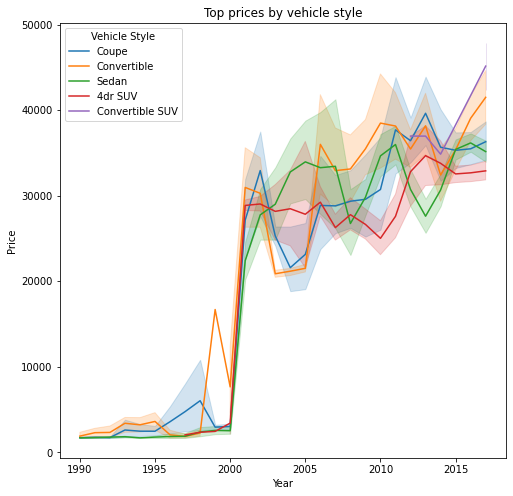

In [ ]:
top_price_vehstyle = cars_cleaned[(cars_cleaned['Vehicle Style'] == 'Convertible') | (cars_cleaned['Vehicle Style'] == 'Coupe') | (cars_cleaned['Vehicle Style'] == 'Sedan') |
                                  (cars_cleaned['Vehicle Style'] == 'Convertible SUV') | (cars_cleaned['Vehicle Style'] == '4dr SUV')]

plt.figure(figsize=(8,8))
sns.lineplot(data=top_price_vehstyle, x='Year', y='Price', hue='Vehicle Style')
plt.title('Top prices by vehicle style')

For now I am finished with visualization of cars data. In the next chapter I will focus on develop machine learning model to predict prices of cars.

# Machine Learning

In this chapter I want to create model to predict price of the car. I will compare different models and try to tune model which will have the best beginning results.

At the beginning I want to check which attributes are strong correlated with cars price

In [ ]:
cars_cleaned.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway l/100km,City l/100km,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,9,12,3916,38292
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,8,12,3916,33739
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,8,11,3916,30170
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,8,13,3916,24443
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,8,13,3916,28635


I will use LabelEncoder function to change word labels to numeric values to use it in correlation matrix. I can check if columns with non numerical values are correlated with price 

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

for col in ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']:
  cars_cleaned[col] = label_encoder.fit_transform(cars_cleaned[col])

Creating labels and features

In [ ]:
corr_matrix = cars_cleaned.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price                1.000000
Engine HP            0.728843
Year                 0.606070
Engine Cylinders     0.401397
Vehicle Size         0.268271
City l/100km         0.187387
Vehicle Style        0.134234
Number of Doors      0.122156
Highway l/100km      0.118861
Popularity           0.111033
Model                0.069701
Market Category     -0.000544
Driven_Wheels       -0.175664
Make                -0.237993
Engine Fuel Type    -0.300990
Transmission Type   -0.301688
Name: Price, dtype: float64

*Plot* of correlation table with values from above.
The results show us that the most correlated  attributes with price are : Year, Engine HP, Engine Cylinders, Vehicle Size, City l/100km, Highway l/100km.

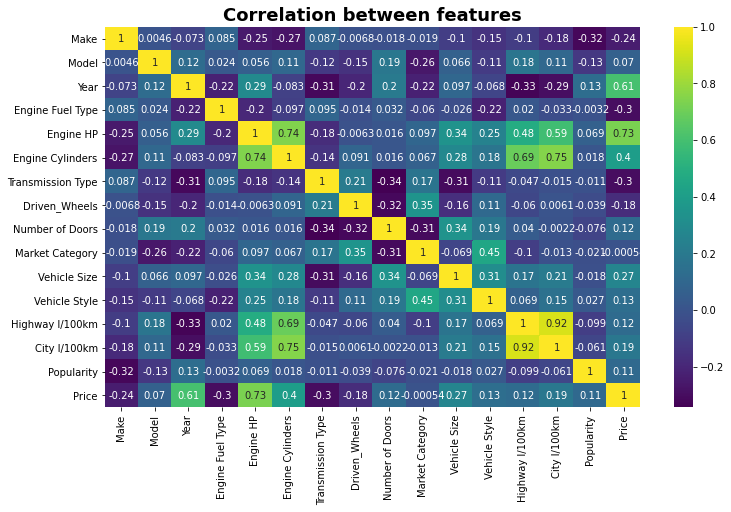

In [ ]:
f,ax = plt.subplots(figsize=(12,7))
sns.heatmap(corr_matrix, cmap='viridis', annot=True)
plt.title('Correlation between features', weight='bold', fontsize=18)
plt.show()

In [ ]:
x = cars_cleaned[['Year', 'Engine HP', 'Engine Cylinders', 'Vehicle Size', 'City l/100km', 'Highway l/100km']]
y = cars_cleaned['Price'].values

In [ ]:
print(x.shape)
print(y.shape)

(6530, 6)
(6530,)


Before I start to devolpe machine learning models I have to normalize data.
To make it I use StandardScaler.

Don't forget to change shape of y values with 'reshape(-1,1)'

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y.reshape(-1,1))

Split the data into train and test set.
I use 20% of data for testing and 80% for training model. 
Random_state = 42, means that your train-test splits are always deterministic. If you don't set a seed, it is different each time.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print('Training features shape:',x_train.shape)
print('Training target shape:',x_test.shape)
print('Testing features shape:',y_train.shape)
print('Testing target shape:',y_test.shape)

Training features shape: (5224, 6)
Training target shape: (1306, 6)
Testing features shape: (5224, 1)
Testing target shape: (1306, 1)


Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(x_train, y_train)  # Training model with data

# Evaluating model on training set
lr_y_pred = lr.predict(x_train) # Making prediction based on training features

# Measuring RMSE(Root mean squared error) on the whole training set
lin_mse = mean_squared_error(y_train, lr_y_pred)
lin_rmse  = np.sqrt(lin_mse)
lin_rmse

0.5441197270095595

Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train) # Training model with data

# Evaluating model on training set
tree_y_pred = tree_reg.predict(x_train) # Making prediction based on training features

# Measuring RMSE(Root mean squared error) on the whole training set
tree_mse = mean_squared_error(y_train, tree_y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.1953266914750705

Decision tree looks very promising with squared ean error only 0,19. What if model has such a good RMSE beacause of overfitting the data?
To check it I will use Cross-Validation function.


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross validation for Linear Regression
lr_scores = cross_val_score(lr, x_train, y_train, scoring ='neg_mean_squared_error', cv=10)
lr_rmse_scores = np.sqrt(-lr_scores)

# Cross validation for Decision tree
tree_scores = cross_val_score(tree_reg, x_train, y_train, scoring = 'neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [ ]:
# Function for checking results of cross validation
def display_scores(scores):
  print('Scores:', scores)
  print('Mean:', scores.mean())
  print('Standard deviation:', scores.std())

In [ ]:
print('Linear Regression')
display_scores(lr_rmse_scores)
print('Decision tree')
display_scores(tree_rmse_scores)

Linear Regression
Scores: [0.53419215 0.60210851 0.55572124 0.54025402 0.51223344 0.51591338
 0.55617217 0.56246276 0.51925606 0.54582327]
Mean: 0.5444137014763747
Standard deviation: 0.025544266293625367
Decision tree
Scores: [0.31084857 0.34673471 0.38241764 0.32040327 0.31990164 0.30741659
 0.31804683 0.29971148 0.30920983 0.32092321]
Mean: 0.3235613764333604
Standard deviation: 0.022932192698583688


From the results we can clearly see that Decision Tree performs much more better on training data than Linear Regression.
I want to test some more models to compere, choose the best one and evaluate it to make better performance.

In [ ]:
ravel_y_train = np.ravel(y_train) # reshaping y_train data

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, ravel_y_train) # Training model with data

# Evaluating model on training set
forest_y_pred = forest_reg.predict(x_train) # Making prediction based on training features

# Measuring RMSE(Root mean squared error) on the whole training set
forest_mse = mean_squared_error(ravel_y_train, forest_y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.20359114784667207

In [ ]:
# Cross validation for Random Forest
forest_scores = cross_val_score(forest_reg, x_train, ravel_y_train, scoring = 'neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [ ]:
display_scores(forest_scores)

Scores: [-0.08337659 -0.10840581 -0.10342538 -0.08077139 -0.08681189 -0.08395768
 -0.08451119 -0.08621325 -0.08049573 -0.07167044]
Mean: -0.08696393541018628
Standard deviation: 0.010360110660456856


For Now the best model in performance is Random forest regressor

MORE MODELS FOR TESTING !!!!

Let's build the data fram to check expression of Random forest model in prediction.

In [ ]:
# Creating lists contain train data and predictions
y_list = list(ravel_y_train)
y_pred_list = list(forest_y_pred)

In [ ]:
# Loop for calculating difference between train features and predictions
cars_table = []
for i in range(10):
  cars_table.append(y_list[i] - y_pred_list[i])

In [ ]:
# Creating Dataframe
df= pd.DataFrame({'Actual': y_list[:10], 'Predictions': y_pred_list[:10], 'Diff': cars_table[:10]})

In [ ]:
df.round(1)
print(df)

     Actual  Predictions      Diff
0  0.414097     0.221014  0.193084
1 -1.168683    -1.167184 -0.001500
2 -0.704589    -0.632172 -0.072417
3 -1.918601    -1.904780 -0.013822
4 -0.153905     0.232214 -0.386119
5  0.672881     0.512236  0.160645
6 -0.487430    -0.339026 -0.148404
7  0.713898     0.616693  0.097204
8 -0.708691    -0.647186 -0.061505
9  1.167813     1.244196 -0.076383


Fine-Tune the model

Grid Search